In [ ]:
# Install packages
!apt install git curl -y
%pip install ftfy regex requests tqdm jupyterlab

# Clone repository
!git clone --recursive https://github.com/crowsonkb/v-diffusion-pytorch

# Download diffusion model
!mkdir v-diffusion-pytorch/checkpoints
!curl -L https://v-diffusion.s3.us-west-2.amazonaws.com/cc12m_1_cfg.pth > v-diffusion-pytorch/checkpoints/cc12m_1_cfg.pth

# Load autoreload extension
%load_ext autoreload
%autoreload 2

In [1]:
from diffusion_model import DiffusionModel

In [ ]:
params = {
    'defaults': {
        'weight': 5,
        'n_images': 1,
        'steps': 100,
        'starting_timestep': 1,
        'eta': 1,
        'seed': 0,
        'display_every': None,
        'side_x': 512,
        'side_y': 256,
        'save': False,
        'step_multiplier': 1.0,
        'upscale': {
            'steps': 100,
            'side_x': 1024,
            'side_y': 512,
            'starting_timestep': 0.6,
        },
        'upscale_xl': {
            'steps': 25,
            'side_x': 2048,
            'side_y': 1024,
            'save': True,
        },
    },
    'batches': [
        {
            'key': 'winter_wonderland_forrest',
            'prompt': 'Mars landscape',
        },
    ]
}

Performing 100 steps at 256x512


  0%|          | 0/100 [00:00<?, ?it/s]

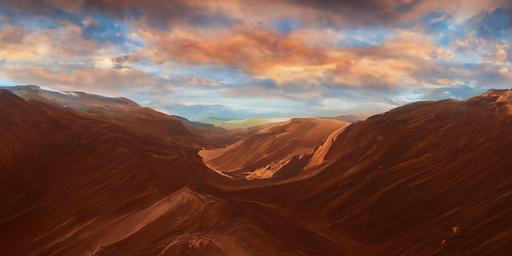

Performing 50 steps at 512x1024


  0%|          | 0/50 [00:00<?, ?it/s]

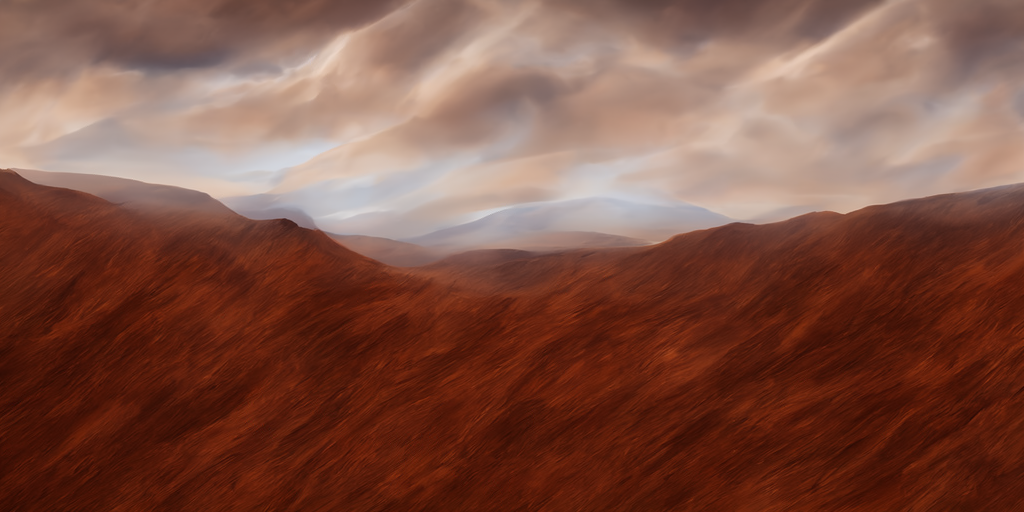

Performing 25 steps at 1024x2048


  0%|          | 0/25 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
for batch in params['batches']:
    init_params = {**params['defaults'], **batch}
    output = DiffusionModel(init_params).run()

    upscale_params = {
        **params['defaults'],
        **params['defaults']['upscale'],
        **batch,
        **batch.get('upscale', {}),
    }
    upscale_output = DiffusionModel(upscale_params, output).run()

    upscale_xl_params = {
        **params['defaults'],
        **params['defaults']['upscale'],
        **params['defaults']['upscale_xl'],
        **batch,
        **batch.get('upscale', {}),
        **batch.get('upscale_xl', {}),
    }
    DiffusionModel(upscale_xl_params, upscale_output).run()

    print('Done!')